**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Alonso Pedrero Martínez
*   MATRÍCULA: A01769076

*   NOMBRE: Salvador D'Carlo Abad Guarro
*   MATRÍCULA: A01017779

*   NOMBRE: Gabriel Sareñana Labra
*   MATRÍCULA: A01795507

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

In [38]:
PATH = "../files/insurance.csv"
insurance_df = pd.read_csv(PATH)
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [39]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [40]:
insurance_df.describe(include = "object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [41]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
missing_porcentage = ((insurance_df.isna().sum()/len(insurance_df)).round(4))*100
display(missing_porcentage)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

No hay valores faltantes, en la info del df nos menciona que en todos los casos son 1338 filas que no tienen non null values.

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

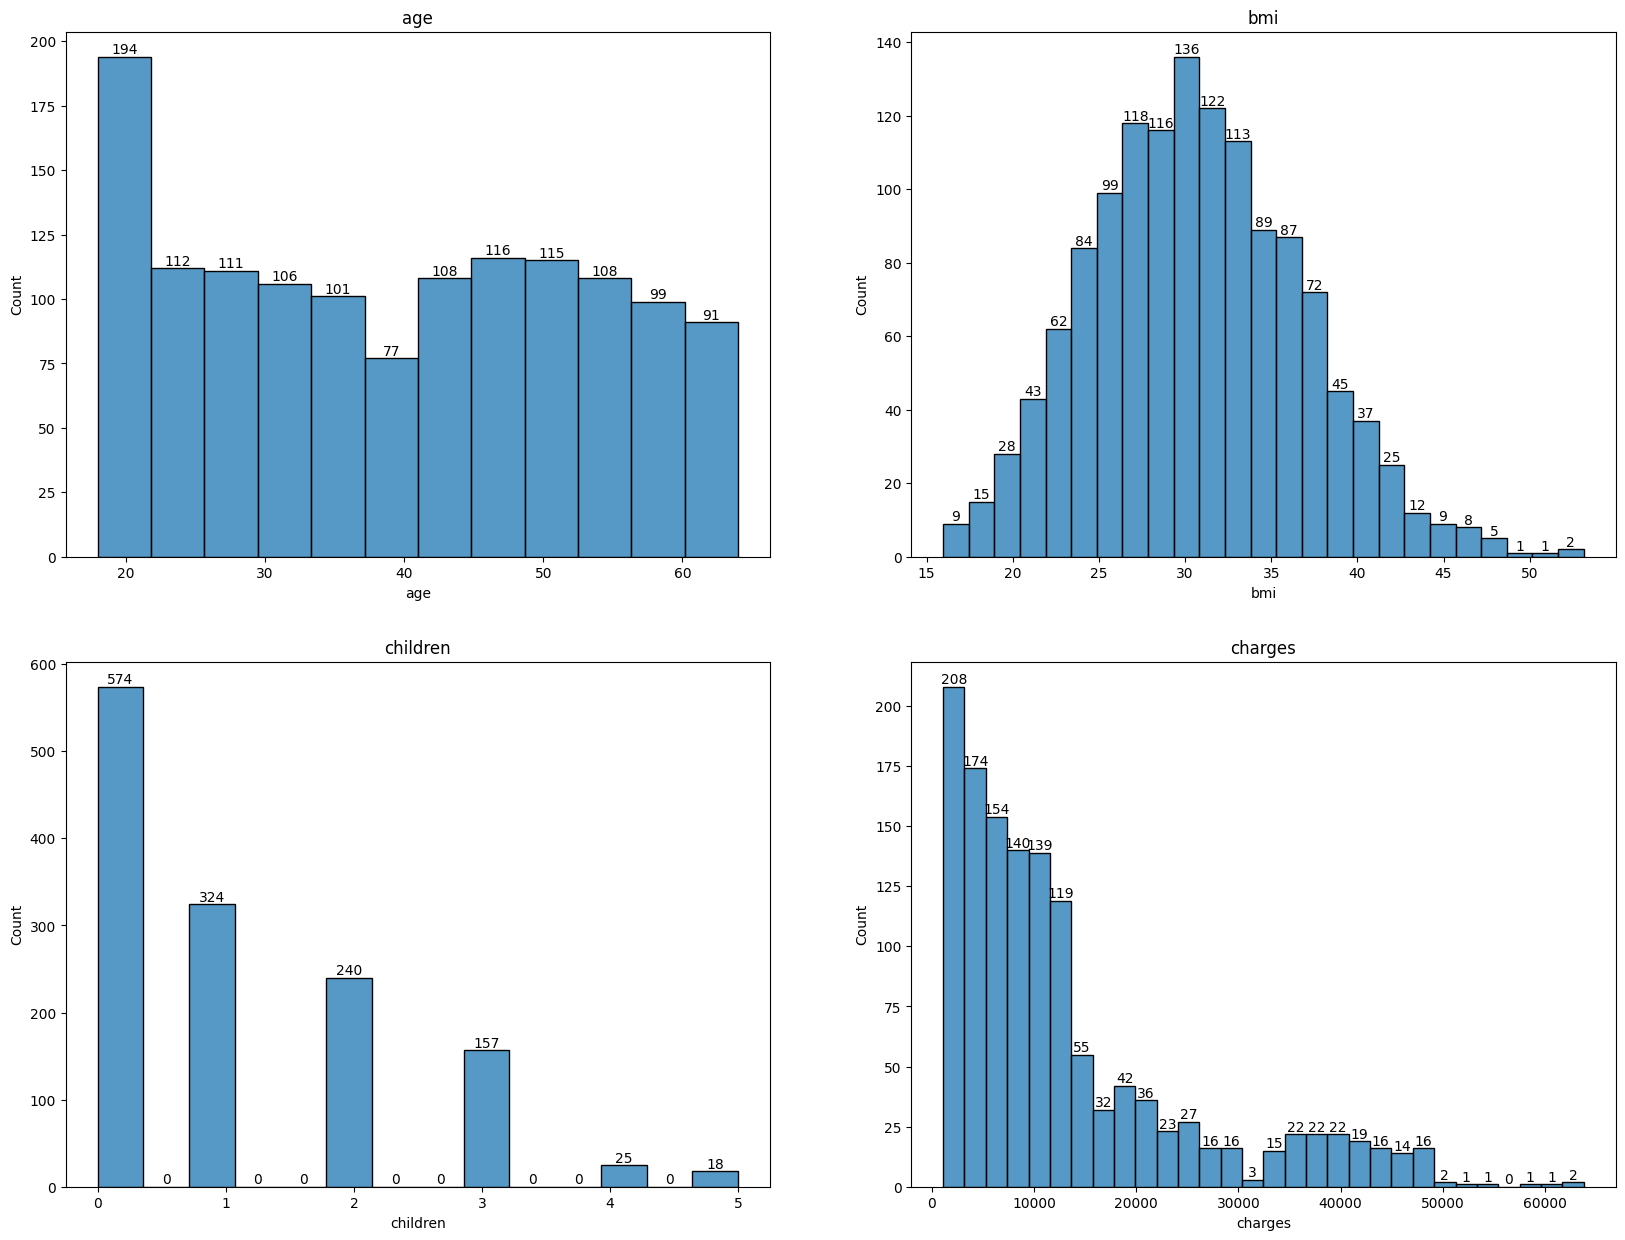

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.histplot(x=insurance_df["age"], ax=axes[0, 0])
sns.histplot(x=insurance_df["bmi"], ax=axes[0, 1])
sns.histplot(x=insurance_df["children"], ax=axes[1, 0])
sns.histplot(x=insurance_df["charges"], ax=axes[1, 1])

axes[0, 0].set_title("age")
axes[0, 1].set_title("bmi")
axes[1, 0].set_title("children")
axes[1, 1].set_title("charges")

for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

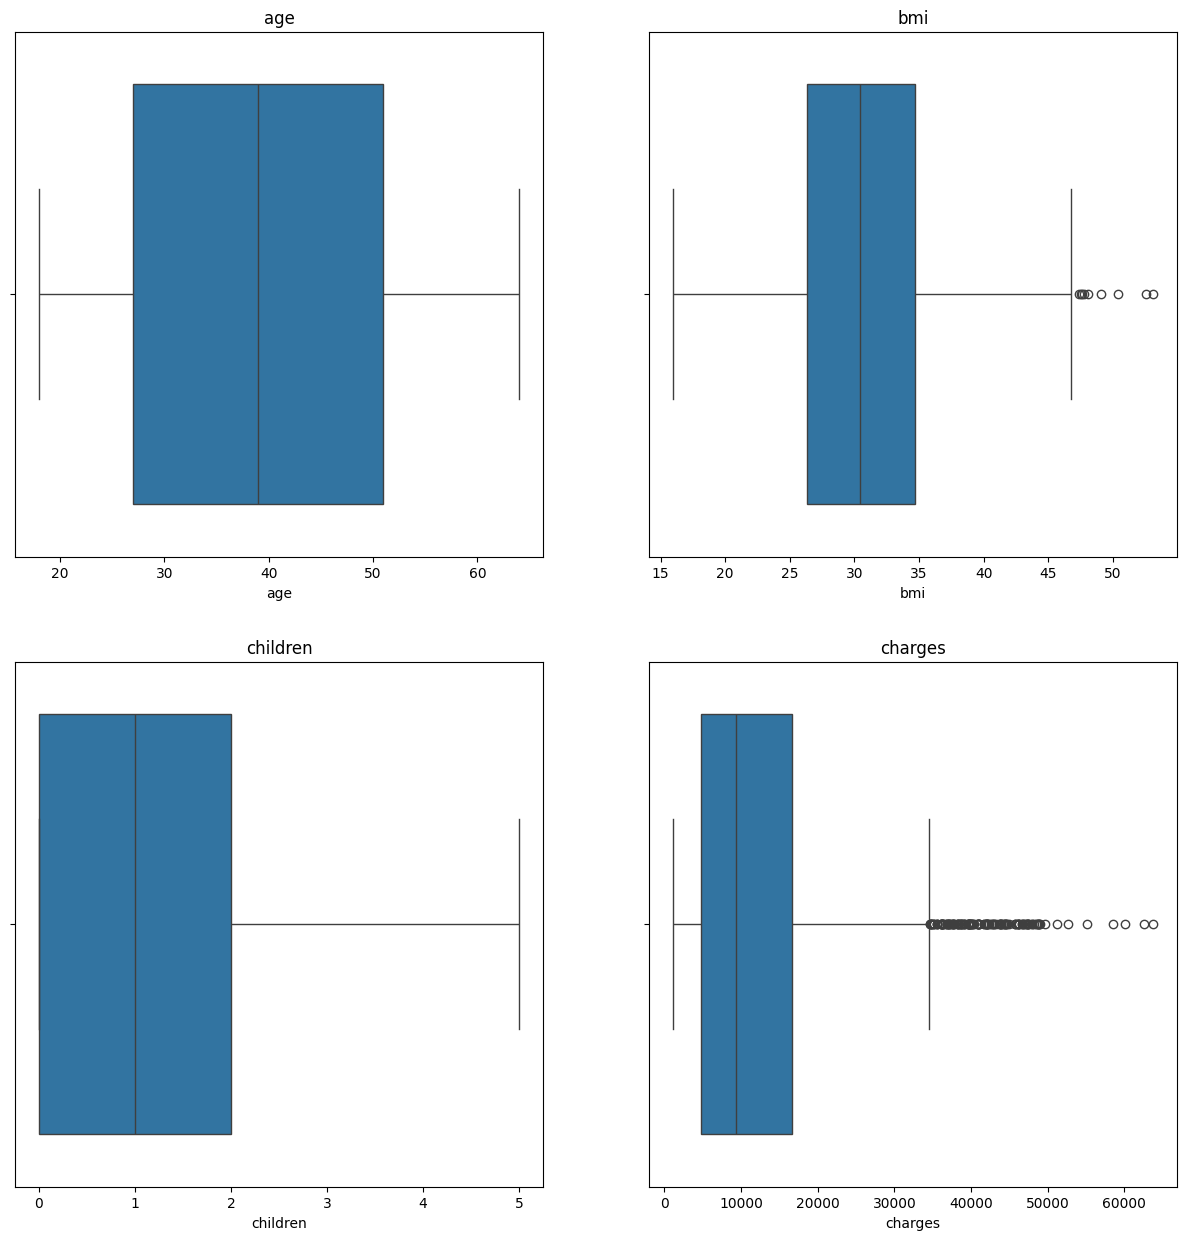

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(x=insurance_df["age"], ax=axes[0, 0])
sns.boxplot(x=insurance_df["bmi"], ax=axes[0, 1])
sns.boxplot(x=insurance_df["children"], ax=axes[1, 0])
sns.boxplot(x=insurance_df["charges"], ax=axes[1, 1])

axes[0, 0].set_title("age")
axes[0, 1].set_title("bmi")
axes[1, 0].set_title("children")
axes[1, 1].set_title("charges")

plt.show()

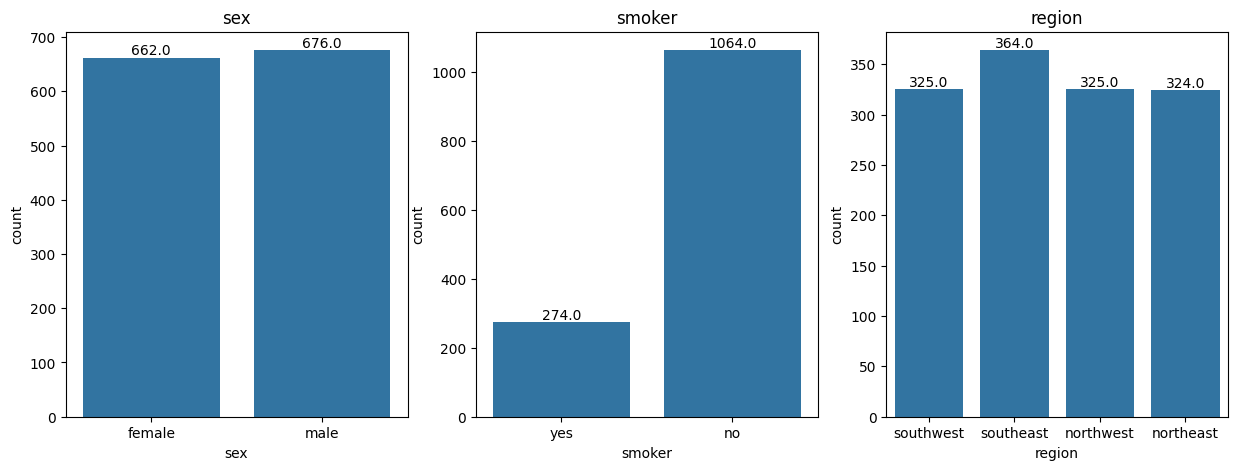

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=insurance_df["sex"], ax=axes[0])
sns.countplot(x=insurance_df["smoker"], ax=axes[1])
sns.countplot(x=insurance_df["region"], ax=axes[2])

axes[0].set_title("sex")
axes[1].set_title("smoker")
axes[2].set_title("region")

for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot. 

<Axes: xlabel='charges', ylabel='sex'>

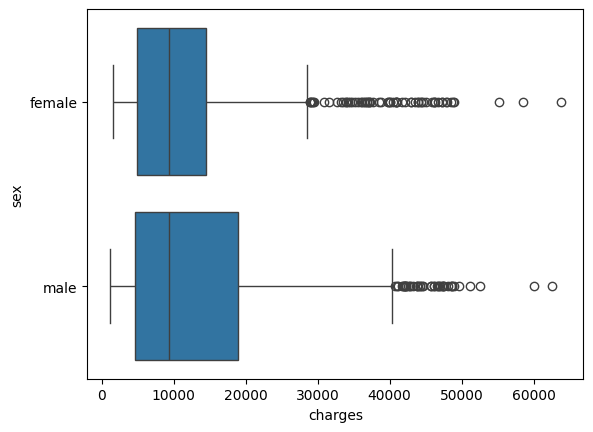

In [46]:
sns.boxplot(x=insurance_df["charges"], y = insurance_df["sex"])

Los charges de hombres tienen una distribución más alta en sus cuartiles que los de las mujeres. Sin embargo los valores outliers de las mujeres tienen un rango mayor de valores que el los hombres.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

<Axes: xlabel='bmi', ylabel='charges'>

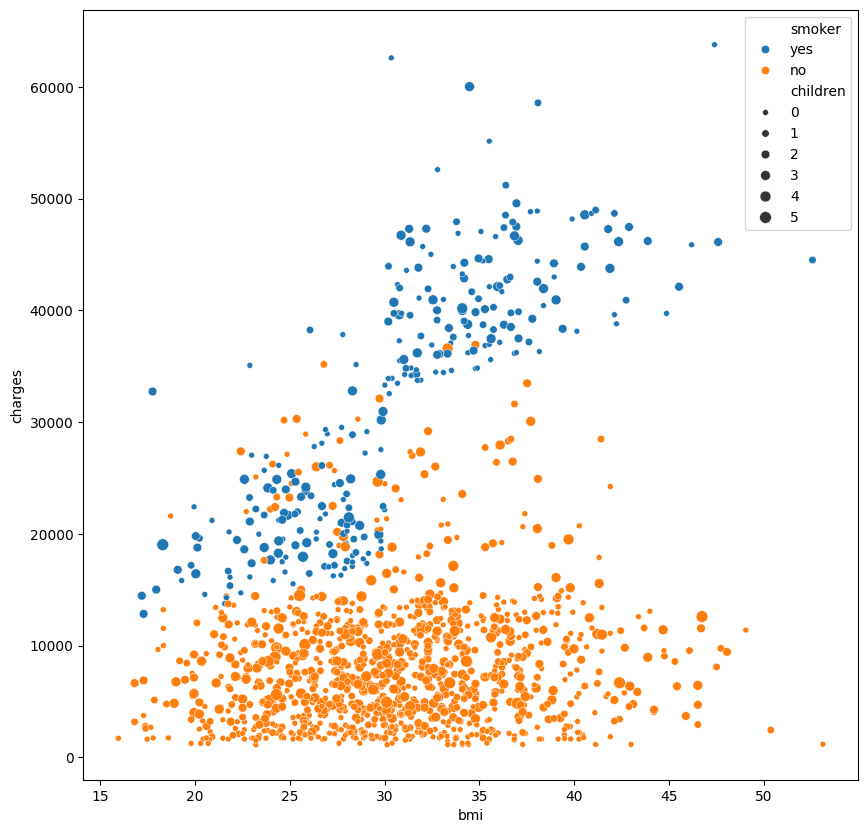

In [47]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = insurance_df, x= "bmi", y= "charges", hue = "smoker", size = "children")

- Se nota que hay un patrón donde los charges de los que fuman son más altos con las asegugadoras y si se agruparan en grupos los datos, si se comportan de forma similar los grupos de fumadores y no fumadoras.
- No se nota una gran diferencia según la cantidad de hijos  en el comportamiento.
- La mayoría de los datos se agurpa hasta la categoría de BMI en 35.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

<Axes: >

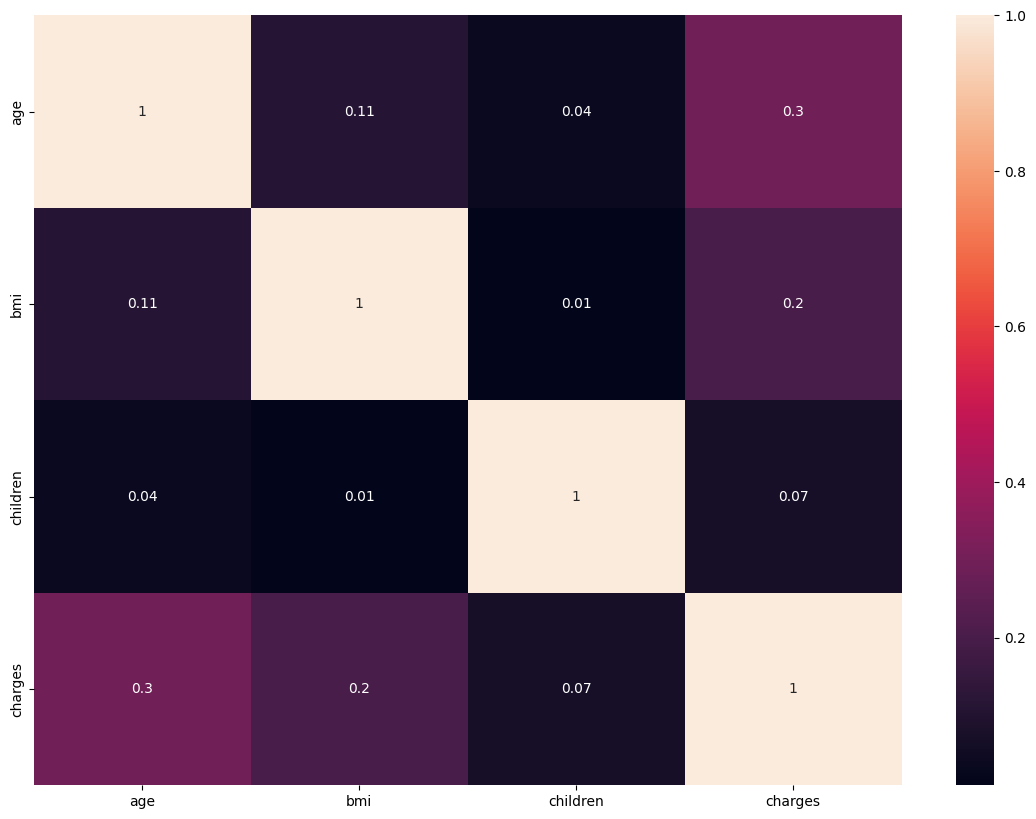

In [48]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(insurance_df.corr(numeric_only=True),2), annot = True)

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

In [49]:
class Outliers():
    @staticmethod
    def outlier_detection(df_input: pd.DataFrame, df_column: str):
        df = df_input.copy(deep=True)
        Q1 = df[df_column].quantile(0.25)
        Q3 = df[df_column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_df = df[(df[df_column] < lower_bound) | (df[df_column] > upper_bound)]

        deleted_percentage = (len(outliers_df) / len(df)) * 100
        percentage_rounded = round(deleted_percentage, 2)
        print("Porcentaje de outliers:", percentage_rounded, "%")

        return outliers_df

In [50]:
insurance_charges_outliers_df = Outliers.outlier_detection(insurance_df, "charges")
display(insurance_charges_outliers_df)

Porcentaje de outliers: 10.39 %


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [51]:
print("Promedio de edad de outliers", round(insurance_charges_outliers_df["age"].mean(), 0))

Promedio de edad de outliers 41.0


In [52]:
print("Promedio de BMI de outliers", round(insurance_charges_outliers_df["bmi"].mean(), 0))

Promedio de BMI de outliers 36.0


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

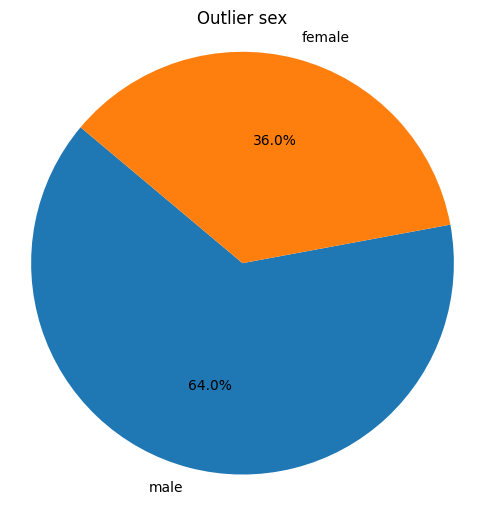

In [53]:
sex_counts = insurance_charges_outliers_df["sex"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Outlier sex")
plt.show()

La mayoría son hombres con el 64% y mujeres con el 36%

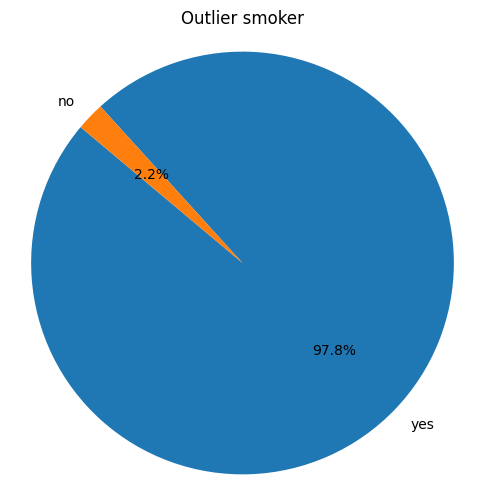

In [54]:
smoker_counts = insurance_charges_outliers_df["smoker"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Outlier smoker")
plt.show()

El 97.8% de los outliers de gastos corresponden que si fuman, indicando que los fumadores tienen gastos más elevados que los no fumadores

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [55]:
y = insurance_df["charges"]
display(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [56]:
X = insurance_df.loc[:, insurance_df.columns != "rating"]
columns_to_drop = ["sex", "region"]
X.drop(columns = columns_to_drop, inplace = True)
display(X)

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=X["smoker"])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [58]:
preprocessing = ColumnTransformer([
    ("text_preprocess", OneHotEncoder(), make_column_selector(dtype_include=object)),
    ("num_preprocess", MinMaxScaler(), make_column_selector(dtype_include=np.number))])

In [59]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=preprocessing.get_feature_names_out(), index=X_train.index)
display(X_train_prepared_df)

,text_preprocess__smoker_no,text_preprocess__smoker_yes,num_preprocess__age,num_preprocess__bmi,num_preprocess__children,num_preprocess__charges
42,1.0,0.0,0.500000,0.136720,0.2,0.082214
847,1.0,0.0,0.108696,0.924274,0.2,0.021009
625,1.0,0.0,0.239130,0.253752,0.0,0.041734
394,1.0,0.0,0.608696,0.426408,0.4,0.132312
621,0.0,1.0,0.413043,0.475974,0.8,0.623484
...,...,...,...,...,...,...
56,1.0,0.0,0.869565,0.413328,0.4,0.199294
599,1.0,0.0,0.739130,0.570288,0.4,0.516374
36,1.0,0.0,0.956522,0.444720,0.6,0.231295
1179,0.0,1.0,0.282609,0.357841,0.0,0.290964


In [60]:
X_test_prepared = preprocessing.fit_transform(X_test)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=preprocessing.get_feature_names_out(), index=X_test.index)
display(X_test_prepared_df)

,text_preprocess__smoker_no,text_preprocess__smoker_yes,num_preprocess__age,num_preprocess__bmi,num_preprocess__children,num_preprocess__charges
868,1.0,0.0,0.934783,0.239645,0.0,0.252264
909,0.0,1.0,0.304348,0.269075,0.0,0.344121
892,1.0,0.0,0.782609,0.251479,0.0,0.195327
603,1.0,0.0,1.000000,0.719091,0.6,0.314436
743,1.0,0.0,0.282609,0.331984,0.0,0.055122
...,...,...,...,...,...,...
785,1.0,0.0,0.369565,0.365618,0.6,0.111000
360,1.0,0.0,0.652174,0.508876,0.4,0.187340
508,1.0,0.0,0.130435,0.289941,0.0,0.040110
1061,1.0,0.0,0.847826,0.373092,0.2,0.219125


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [61]:
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 1.3591172261680536e-11
The R square (R2) is: 1.0


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


In [62]:
class OutlierUpperLimit():
    @staticmethod
    def outlier_replacement(df_input: pd.DataFrame, df_column: str, serie_input_1: pd.Series, serie_input_2: pd.Series):
        df = df_input.copy(deep=True)
        Q1 = df[df_column].quantile(0.25)
        Q3 = df[df_column].quantile(0.75)
        IQR = Q3 - Q1

        upper_bound = Q3 + 1.5 * IQR
        print("Upper bound", upper_bound)

        serie_input_1 = serie_input_1.apply(lambda x: upper_bound if x > upper_bound else x)
        serie_input_2 = serie_input_2.apply(lambda x: upper_bound if x > upper_bound else x)
        
        return serie_input_1, serie_input_2

In [63]:
print("y_train max value:", y_train.max())
print("y_train len:", len(y_train))

print("y_test max value:", y_test.max())
print("y_test len:", len(y_test))


y_train max value: 63770.42801
y_train len: 1070
y_test max value: 48675.5177
y_test len: 268


In [64]:
y_train, y_test = OutlierUpperLimit.outlier_replacement(insurance_df, "charges", y_train, y_test)


Upper bound 34489.350562499996


In [65]:
print("y_train max value:", y_train.max())
print("y_train len:", len(y_train))

print("y_test max value:", y_test.max())
print("y_test len:", len(y_test))

y_train max value: 34489.350562499996
y_train len: 1070
y_test max value: 34489.350562499996
y_test len: 268


In [66]:
lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(X_train, y_train)
predictions = lr_model2.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 1474.0689483429771
The R square (R2) is: 0.9778336479445616


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [67]:
preprocessing2 = ColumnTransformer([
    ("text_preprocess", OrdinalEncoder(), make_column_selector(dtype_include=object)),
    ("num_preprocess", StandardScaler(), make_column_selector(dtype_include=np.number))])

In [68]:
lr_model3 = make_pipeline(preprocessing2, LinearRegression())
lr_model3.fit(X_train, y_train)
predictions = lr_model3.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 1468.9479394059751
The R square (R2) is: 0.9779873950396868


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [69]:
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2), LinearRegression())
lr_model4.fit(X_train, y_train)
predictions = lr_model4.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 697.3561021559033
The R square (R2) is: 0.995039015820161


In [70]:
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=3), LinearRegression())
lr_model4.fit(X_train, y_train)
predictions = lr_model4.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 299.72383040874763
The R square (R2) is: 0.9990835660293055


In [71]:
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=4), LinearRegression())
lr_model4.fit(X_train, y_train)
predictions = lr_model4.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 221.00400954037872
The R square (R2) is: 0.999501736657723


In [72]:
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=5), LinearRegression())
lr_model4.fit(X_train, y_train)
predictions = lr_model4.predict(X_test)

print("The Root Mean Square Error (RMSE) is:", mean_squared_error(y_test, predictions, squared=False))
print("The R square (R2) is:", r2_score(y_test, predictions))

The Root Mean Square Error (RMSE) is: 139.62630643840063
The R square (R2) is: 0.9998011190753385


El mejor modelo de regresión polinomial fue el de grado 5 ya que este nos presenta el valor más bajo de RMSE de 139.62 y el valor más alto de R2 de 0.99. Esto nos da mejores comparaciones con las demás pruebas pero es importante considerar que para un modelo no siempre es lo mejor escoger el valor más alto ya que este podría estar sobre ajustado, dando una mala predicción como resultado. 